In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df=pd.read_csv('cancer.csv')

In [62]:
df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN,NaN,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN,NaN,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN,NaN,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN,NaN,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN,NaN,NaN


In [6]:
df.shape

(699, 14)

In [65]:
total = df.isnull().sum().sort_values(ascending=False)
total

Class                          0
Mitoses                        0
Bland Chromatin                0
Normal Nucleoli                0
Bare Nuclei                    0
Single Epithelial Cell Size    0
Marginal Adhesion              0
Cell Shape                     0
Cell Size                      0
ClumpThickness                 0
dtype: int64

In [70]:
df.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [72]:
df['Bare Nuclei']=df['Bare Nuclei'].replace('?',np.nan)

In [76]:
df['Bare Nuclei'] = df['Bare Nuclei'].fillna(df['Bare Nuclei'].median())

In [ ]:
df['Bare Nuclei']=df['Bare Nuclei'].astype('int64')

In [64]:
df=df.drop(['Unnamed: 13','Unnamed: 12','Unnamed: 11','ID'],axis=1)

In [33]:
df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [79]:
df.dtypes

ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [81]:
X=df.iloc[:,0:9]
y=df.iloc[:,9]

In [84]:
cov_matrix = np.cov(X, rowvar=False)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 7.92839546  5.541164    5.47769019  3.91030781  3.25346893  6.01714689
   3.83405684  4.60723465  1.69038864]
 [ 5.541164    9.3114027   8.22421306  6.14778583  5.07979061  7.58922284
   5.62299396  6.73568258  2.4005661 ]
 [ 5.47769019  8.22421306  8.8322655   5.79656775  4.73592648  7.6152875
   5.33312837  6.52907141  2.23715623]
 [ 3.91030781  6.14778583  5.79656775  8.1531906   3.7910646   6.8978012
   4.64197523  5.26080032  2.04523039]
 [ 3.25346893  5.07979061  4.73592648  3.7910646   4.90312399  4.6813069
   3.32649999  4.25227812  1.81948219]
 [ 6.01714689  7.58922284  7.6152875   6.8978012   4.6813069  13.11836803
   5.95438223  6.35707171  2.12693328]
 [ 3.83405684  5.62299396  5.33312837  4.64197523  3.32649999  5.95438223
   5.94562023  4.95804075  1.43931158]
 [ 4.60723465  6.73568258  6.52907141  5.26080032  4.25227812  6.35707171
   4.95804075  9.32467996  2.24328861]
 [ 1.69038864  2.4005661   2.23715623  2.04523039  1.81948219  2.12693328


In [86]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.2983261  -0.06201421 -0.84870565  0.00500527 -0.06534325  0.40932322
  -0.07699746  0.09155611  0.02651537]
 [-0.40439054  0.2264635  -0.02546854  0.72697817 -0.28496176 -0.34595861
  -0.09420965 -0.12540484 -0.17476917]
 [-0.39224516  0.16441813 -0.07517707 -0.6672754  -0.19835691 -0.38210846
  -0.09446697 -0.24132109 -0.34013253]
 [-0.33155363 -0.09978919  0.48286957 -0.04289237 -0.39844272  0.63456569
  -0.1885437   0.10620924 -0.19196921]
 [-0.25000985  0.18417043  0.04907438 -0.11535457 -0.19968275 -0.19340991
   0.40559877  0.75378154  0.27907667]
 [-0.43971674 -0.78618671  0.08447575  0.05908462  0.30713642 -0.16587589
   0.23024765 -0.01561869 -0.05316947]
 [-0.29212756  0.01476453  0.10830834 -0.08244777  0.04657243 -0.08070772
  -0.47383441 -0.16845026  0.79645332]
 [-0.35663675  0.4789494   0.13315283  0.02513156  0.74476283  0.2099911
   0.02554583  0.05320778 -0.1510127 ]
 [-0.12370014  0.16204477  0.03508036 -0.01243264 -0.15930581  0.2203507

In [87]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort()
eig_pairs.reverse()
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[48.54620294883735, 5.170199120105075, 4.286098929270728, 3.1015486510715484, 2.735501585983391, 2.445180650621364, 1.7768574833457507, 1.5940750702857096, 0.8028743654030337]


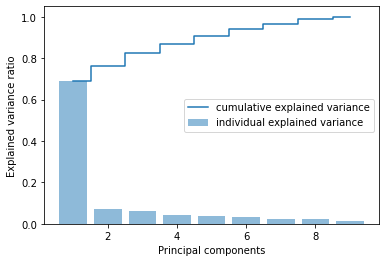

In [90]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  
cum_var_exp = np.cumsum(var_explained)
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [91]:
P_reduce = np.array(eigvectors_sort[0:8]).transpose()
Proj_data_2D = np.dot(X,P_reduce)

In [92]:
X.shape, P_reduce.shape, Proj_data_2D.shape

((699, 9), (9, 8), (699, 8))

In [96]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_2D, y, test_size=test_size, random_state=seed)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
model = LogisticRegression()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)

0.9523809523809523
